In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the data 
df = pd.read_csv('bank-marketing.csv')

In [5]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [7]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

## Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [9]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [10]:
# Finding out the mean, median and minimum value of the pdays column

print(df['pdays'].mean()) 
print(df['pdays'].median())
print(df['pdays'].min())

40.19782796222158
-1.0
-1


In [11]:
df.shape

(45211, 19)

In [12]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

- From the above values we can see that, the pdays has the negative value
- pdays means, number of days that passed by after the client was last contacted from previous campaign
- But, days can not be negative

## Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [13]:
print(df['pdays'].mean()) 
print(df['pdays'].median())

40.19782796222158
-1.0


In [14]:
# here we are selecting those values whcih are positive in the pdays column
nndf =df[df['pdays']>0]

In [15]:
nndf['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [16]:
nndf['pdays'].median()

194.0

- So, here we have selectd those values which don't have negative values in the dataset that is the pdays values which were negative we didn't take those values So, now our pdays column doen't have any negative days or values in it

## Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [17]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<AxesSubplot:ylabel='education'>

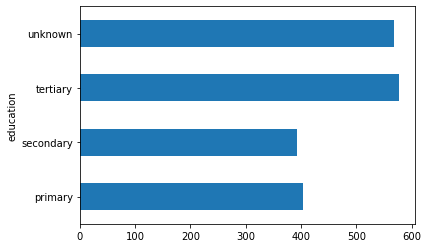

In [18]:
df.groupby(df['education'])['balance'].median().plot.barh()

## Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

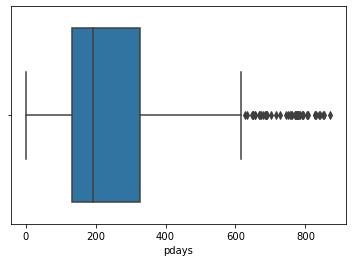

In [19]:
# checking if there are any outliers or not and we are checking this on the new data which is 'nndf' in which we have taken only
# positive values instead of negative values
sns.boxplot(nndf['pdays'])

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.
### First, perform bi-variate analysis to identify the features that are directly associated with the target variable.

## Convert the response variable to a convenient form

In [20]:
nndf['response'].value_counts()

no     6352
yes    1905
Name: response, dtype: int64

In [21]:
# getting the percentage value of both yes and no
nndf['response'].value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [22]:
nndf.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [23]:
# replacing response column with the numerical values as it is a categorical column and replacing yes as 1 and no as 0 
datamapping = {"yes":1, "no":0}

In [24]:
nndf['response']=nndf['response'].map(datamapping)

In [25]:
nndf.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [26]:
# here getting all the categorical and numerical features in a seperate list

obj_col = []
num_col = []
for i in nndf.columns:
    if nndf[i].dtype=='O':
        obj_col.append(i)
    else:
        num_col.append(i)

In [27]:
print("Categorical Columns: ",obj_col)
print("Numerical Columns: ",num_col)

Categorical Columns:  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical Columns:  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


## Make suitable plots for associations with numerical features and categorical features’

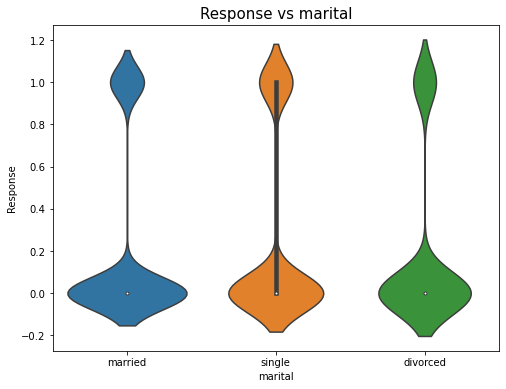

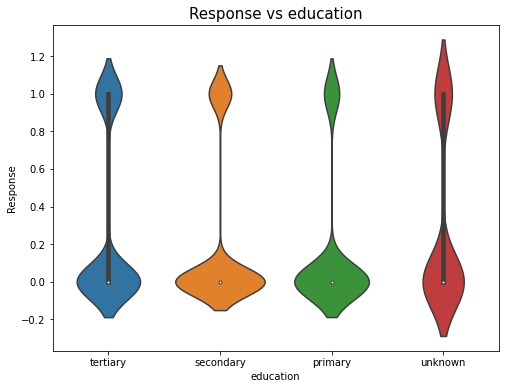

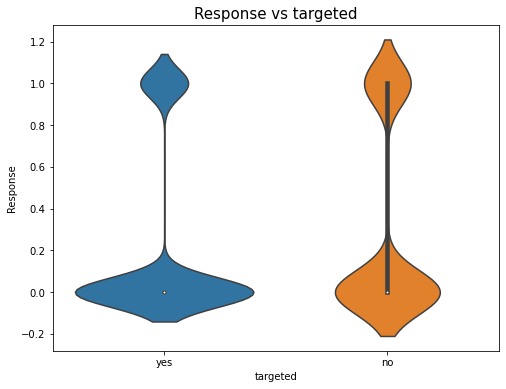

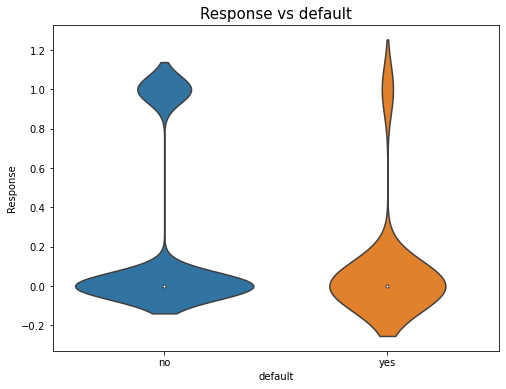

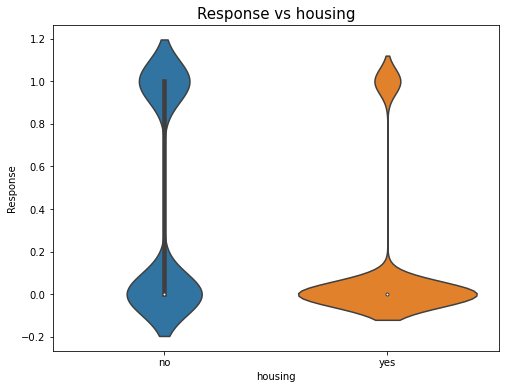

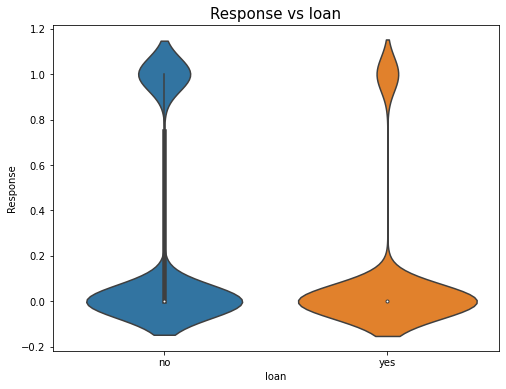

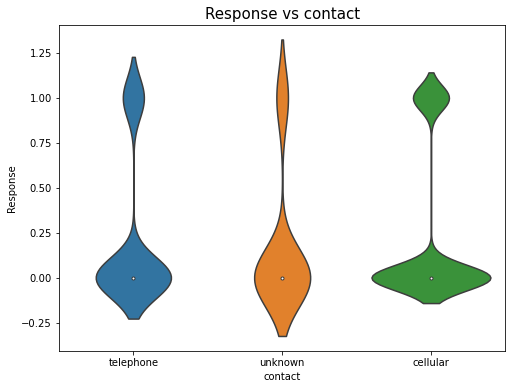

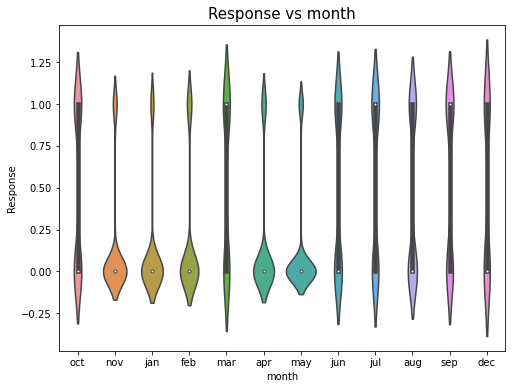

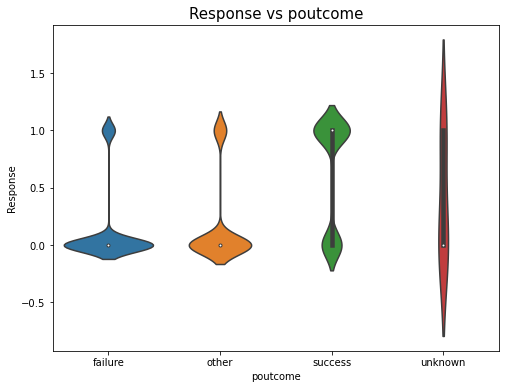

In [28]:
# creating a loop to show the boxplot for all the categorical features with the dependent feature
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(nndf[col],nndf["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

In [29]:
num_col

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'response']

In [30]:
nndf

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1


In [31]:
nndf[nndf['pdays']>620].index

Int64Index([43368, 43404, 43507, 43586, 43727, 43848, 43884, 43887, 43964,
            43983, 44038, 44052, 44089, 44120, 44243, 44251, 44260, 44287,
            44446, 44489, 44496, 44530, 44546, 44570, 44604, 44667, 44683,
            44698, 44711, 44754, 44785, 44798, 44815, 44822, 44829, 44832,
            44837, 44840, 44858, 44864, 44906, 44924, 44960, 44965, 44974,
            45024, 45037, 45120, 45146],
           dtype='int64')

In [32]:
nndf.drop(index=nndf[nndf['pdays']>620].index, inplace=True)

<AxesSubplot:xlabel='pdays'>

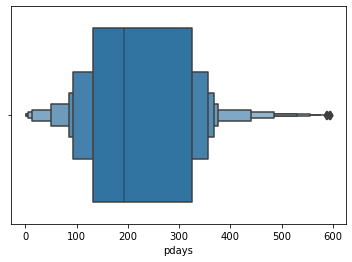

In [33]:
nndf.drop(index=nndf[nndf['pdays']>600].index, inplace=True)
sns.boxenplot(nndf['pdays'])

Text(0.5, 1.0, 'Correlation between all the Numerical Features')

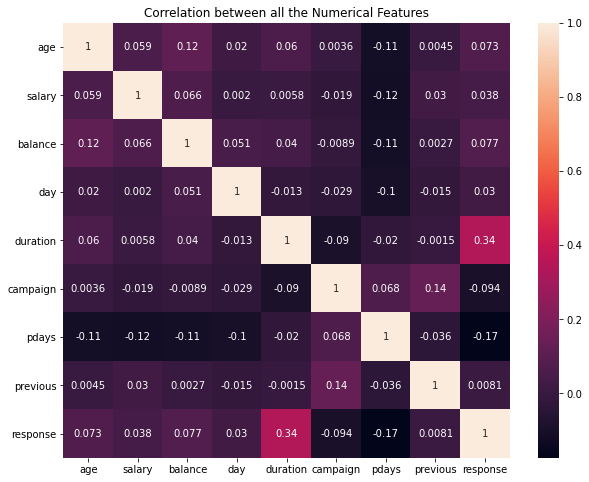

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(nndf.corr(), annot=True)
plt.title('Correlation between all the Numerical Features')

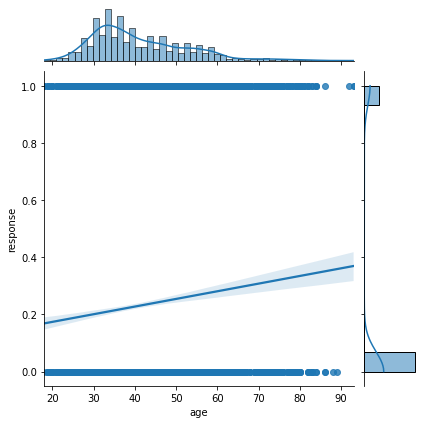

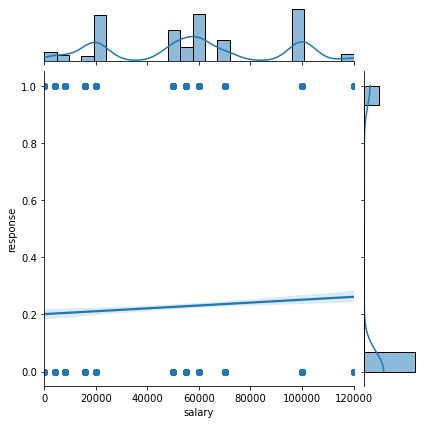

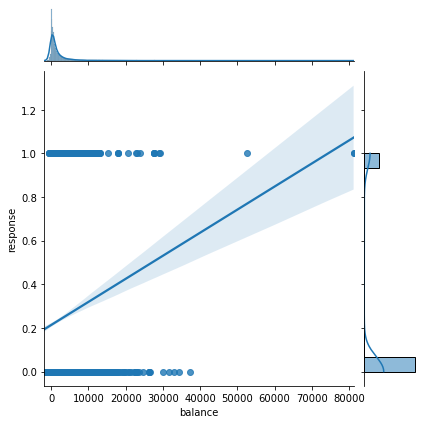

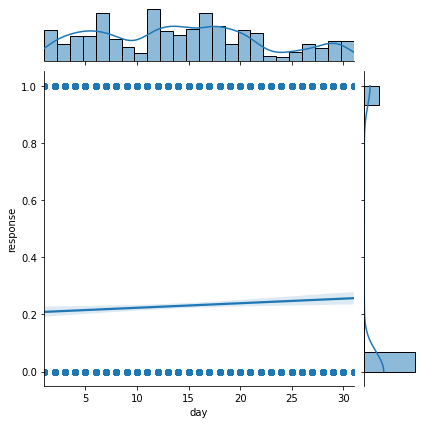

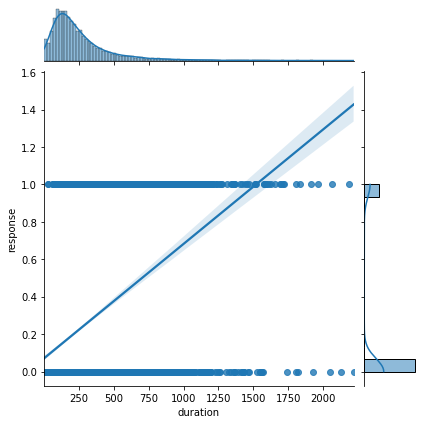

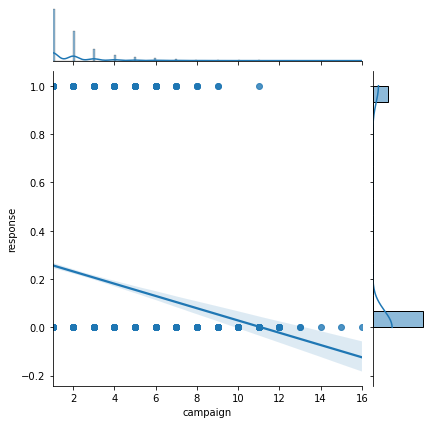

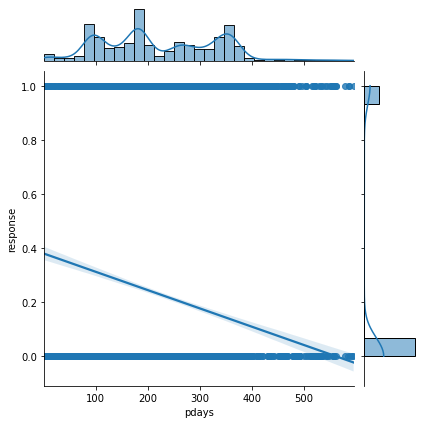

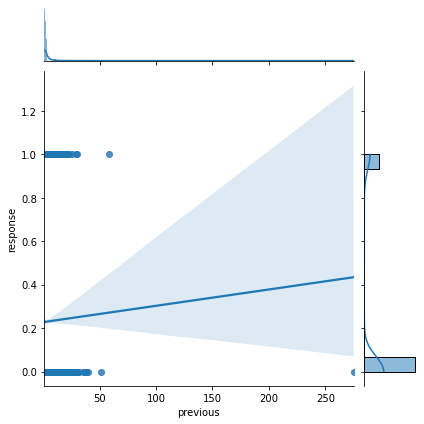

In [35]:
for i in num_col[:-1]:
    sns.jointplot(x=nndf[i], y=nndf['response'], kind='reg')
    plt.xlabel(i)
    plt.ylabel("response")
    plt.show()

## Before the predictive modeling part, make sure to perform –

- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
# converting all the categorical values into numerical values using LabelEncoder
leobj = nndf[obj_col].apply(le.fit_transform)

In [39]:
leobj

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0
...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1
45201,4,1,2,1,0,0,0,0,9,2
45204,5,1,1,1,0,0,0,0,9,0
45208,5,1,1,1,0,0,0,0,9,2


In [40]:
lenum = nndf[num_col]
lenum

,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,33,50000,882,21,39,1,151,3,0
24062,42,50000,-247,21,519,1,166,1,1
24064,33,70000,3444,21,144,1,91,4,1
24072,36,100000,2415,22,73,1,86,4,0
24077,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...
45199,34,20000,1475,16,1166,3,530,12,0
45201,53,100000,583,17,226,1,184,4,1
45204,73,55000,2850,17,300,1,40,8,1
45208,72,55000,5715,17,1127,5,184,3,1


In [41]:
dfmain = leobj.join(lenum)

In [42]:
dfmain

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530,12,0
45201,4,1,2,1,0,0,0,0,9,2,53,100000,583,17,226,1,184,4,1
45204,5,1,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40,8,1
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184,3,1


In [43]:
dfmain.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072865,0.159377,-0.091083,-0.021111,-0.132182,-0.033795,0.000723,-0.002806,0.066452,-0.020727,0.115646,0.041900,0.014952,0.023745,-0.009013,-0.116824,-0.000903,0.079660
marital,0.072865,1.000000,0.122070,-0.255486,-0.005753,-0.056352,-0.055374,-0.028908,-0.024663,0.045484,-0.415511,-0.043422,-0.020178,0.016389,-0.009392,-0.008772,-0.006392,0.005519,0.049751
education,0.159377,0.122070,1.000000,-0.632761,-0.013600,-0.127906,-0.048812,-0.050515,-0.012213,0.083959,-0.120713,0.422500,0.074225,0.023110,-0.001378,-0.024108,-0.157076,0.000963,0.108581
targeted,-0.091083,-0.255486,-0.632761,1.000000,0.019620,0.086574,0.070190,0.024672,0.011374,-0.071648,0.141069,-0.227927,-0.052601,-0.025070,-0.016042,0.017189,0.084503,-0.002387,-0.092791
default,-0.021111,-0.005753,-0.013600,0.019620,1.000000,0.022611,0.052473,-0.019521,0.020435,-0.025767,-0.027905,0.000392,-0.045128,-0.000964,-0.002728,-0.002308,0.038702,0.012505,-0.028256
housing,-0.132182,-0.056352,-0.127906,0.086574,0.022611,1.000000,0.112240,-0.072051,0.017032,-0.287046,-0.179517,-0.034703,-0.109598,-0.067401,-0.072505,0.062326,0.365964,0.007706,-0.320280
loan,-0.033795,-0.055374,-0.048812,0.070190,0.052473,0.112240,1.000000,-0.028964,-0.000715,-0.103648,-0.009009,0.014393,-0.084921,0.008988,-0.032730,0.008033,0.022819,0.013683,-0.115212
contact,0.000723,-0.028908,-0.050515,0.024672,-0.019521,-0.072051,-0.028964,1.000000,0.041944,0.024316,0.175935,-0.035471,0.038262,-0.012872,-0.023321,0.077261,0.012072,0.037374,-0.007714
month,-0.002806,-0.024663,-0.012213,0.011374,0.020435,0.017032,-0.000715,0.041944,1.000000,-0.018198,0.014876,0.018868,0.016244,-0.024655,-0.034737,0.024708,0.010131,0.012016,-0.009015
poutcome,0.066452,0.045484,0.083959,-0.071648,-0.025767,-0.287046,-0.103648,0.024316,-0.018198,1.000000,0.052255,0.013536,0.051497,0.016912,0.110449,-0.001180,-0.243675,0.042900,0.425229


<AxesSubplot:>

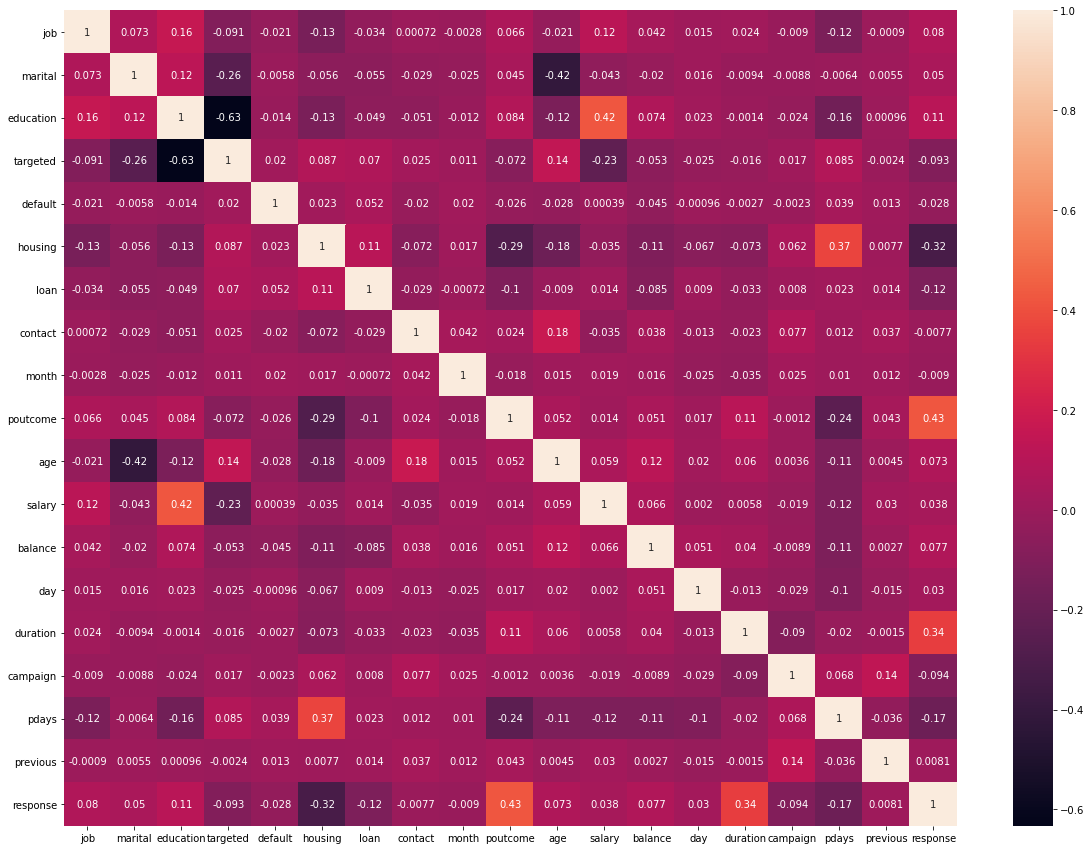

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(dfmain.corr(), annot=True)

## Train test split

In [45]:
dfmain.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [46]:
# storing independent and dependent features in X and y
X = dfmain.drop('response', axis=1)
y = dfmain['response']

In [47]:
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [48]:
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=150)

## Logistic regression

### Make a predictive model using logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression()

In [53]:
lr.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_predict = lr.predict(X_test)

In [55]:
lr.score(X_test, y_test)

0.7958561852528946

In [56]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1279
           1       0.60      0.22      0.32       362

    accuracy                           0.80      1641
   macro avg       0.71      0.59      0.60      1641
weighted avg       0.77      0.80      0.76      1641



In [58]:
confusion_matrix(y_predict, y_test)

array([[1227,  283],
       [  52,   79]], dtype=int64)

## Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [59]:
from sklearn.feature_selection import RFE

In [60]:
rfe = RFE(lr, 5)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [61]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [62]:
X_train.columns[rfe.support_]

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [63]:
rfecol = X_train.columns[rfe.support_]
rfecol

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [64]:
lr.fit(X_train[rfecol], y_train)

LogisticRegression()

In [65]:
y_predrfe = lr.predict(X_test[rfecol])

In [66]:
print(classification_report(y_predrfe, y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1438
           1       0.37      0.66      0.47       203

    accuracy                           0.82      1641
   macro avg       0.66      0.75      0.68      1641
weighted avg       0.87      0.82      0.84      1641



In [67]:
confusion_matrix(y_predrfe, y_test)

array([[1209,  229],
       [  70,  133]], dtype=int64)

In [68]:
f1_score(y_predrfe, y_test)

0.47079646017699106

## Using Stats Model

In [69]:
import statsmodels.api as sm

In [70]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
39662,0,0,1,1,0,0,0,0,8,2,47,50000,2232,27,439,1,103,1
39390,7,1,1,1,0,1,0,0,8,0,37,70000,1543,22,298,1,10,6
24421,9,1,1,1,0,0,1,0,9,0,43,60000,0,17,103,2,193,3
41278,4,1,2,1,0,0,0,0,1,2,36,100000,255,25,242,6,95,4
35623,7,1,1,1,0,1,0,0,8,0,37,70000,4760,8,182,2,169,2


In [71]:
X_train_sm = sm.add_constant(X_train[rfecol])
X_train_sm.head()

,const,default,housing,loan,contact,poutcome
39662,1.0,0,0,0,0,2
39390,1.0,0,1,0,0,0
24421,1.0,0,0,1,0,0
41278,1.0,0,0,0,0,2
35623,1.0,0,1,0,0,0


In [72]:
lrstats = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial()).fit()

In [73]:
lrstats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                 6564
Model:                            GLM   Df Residuals:                     6558
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2795.8
Date:                Thu, 27 Jan 2022   Deviance:                       5591.5
Time:                        20:16:12   Pearson chi2:                 6.89e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3344      0.064    -20.921      0.000      -1.459      -1.209
default       -0.6740      0.543     -1.241      0.215      -1.739       0.391
housing       -1.1481      0.068    -16.812      0.000      -1.282      -1.014
loan          -0.6684      0.121     -5.544      0.000      -0.905      -0.432
contact       -0.2671      0.111     -2.412      0.016      -0.484      -0.050
poutcome       1.0952      0.041     27.039      0.000       1.016       1.175
==============================================================================
"""

## VIF (Variance Inflation Factor)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
10,age,11.93
3,targeted,6.63
2,education,6.46
16,pdays,5.84
11,salary,5.38
1,marital,4.46
13,day,4.10
8,month,3.61
5,housing,3.26
0,job,2.87


- From the above steps and after getting the important fetures, we can say that Housing, Loan, default, contact and poutcome are the important features

## Use Cross Validation

In [76]:
# here we will use Cross Validation to check the score again using this technique

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(),X, y, cv=cv )

array([0.79341865, 0.79098111, 0.78062157, 0.79341865, 0.7794028 ])

- After performing cross validation we got score and it is around 78%

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, y_predrfe))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1279
           1       0.66      0.37      0.47       362

    accuracy                           0.82      1641
   macro avg       0.75      0.66      0.68      1641
weighted avg       0.80      0.82      0.80      1641



## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [80]:
rf = RandomForestClassifier(n_estimators=30, max_depth=5)

In [81]:
rf.fit(X_train,y_train )

RandomForestClassifier(max_depth=5, n_estimators=30)

In [82]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [83]:
rf.score(X_test, y_test)

0.8342474101157831

In [84]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1279
           1       0.71      0.42      0.53       362

    accuracy                           0.83      1641
   macro avg       0.78      0.68      0.71      1641
weighted avg       0.82      0.83      0.82      1641



In [85]:
f1_score(y_test,y_pred_rf)

0.5261324041811846

In [86]:
confusion_matrix(y_test,y_pred_rf)

array([[1218,   61],
       [ 211,  151]], dtype=int64)

## Cross Validation

In [87]:
# here we will use Cross Validation to check the score again using this technique

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestClassifier(),X, y, cv=cv )

array([0.84156002, 0.84277879, 0.84460695, 0.85252895, 0.84765387])

- After using the cross validation we can see that the score is almost same as we got using the RandomForest Som we can use the above model also

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1279
           1       0.71      0.42      0.53       362

    accuracy                           0.83      1641
   macro avg       0.78      0.68      0.71      1641
weighted avg       0.82      0.83      0.82      1641



## Recursive Feature Elimination

In [90]:
from sklearn.feature_selection import RFE

In [91]:
rfe1 = RFE(rf, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, n_estimators=30),
    n_features_to_select=5)

In [92]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [93]:
X_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [94]:
topcols = X_train.columns[rfe1.support_]

In [95]:
rf.fit(X_train[topcols], y_train)

RandomForestClassifier(max_depth=5, n_estimators=30)

In [96]:
y_predrfrfe = rf.predict(X_test[topcols])

In [98]:
confusion_matrix(y_predrfrfe, y_test)

array([[1206,  198],
       [  73,  164]], dtype=int64)

- As we have come up with the confusion matrix, we have calculated the end result
### And from the Random Forest and Recursive Feature Elimination we got the important features as housing, month, poutcome, duration and pdays

## Compare the performance of the Random Forest and the logistic model –
- Evaluate both models on the test set
- Which metric did you choose and why?
- Which model has better performance on the test set?

In [99]:
# accuracy score for the Logistic Regression
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1279
           1       0.60      0.22      0.32       362

    accuracy                           0.80      1641
   macro avg       0.71      0.59      0.60      1641
weighted avg       0.77      0.80      0.76      1641



In [100]:
# accuracy score for the Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1279
           1       0.71      0.42      0.53       362

    accuracy                           0.83      1641
   macro avg       0.78      0.68      0.71      1641
weighted avg       0.82      0.83      0.82      1641



- So, from the above scores which we have got, we can see that the Random Forest has got the better result so we are choosing Random 
Forest Model

### Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

In [101]:
# best features after performing RFE on Logistic Regression
rfecol = X_train.columns[rfe.support_]
rfecol

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [102]:
# best features after performing RFE on Random Forest
topcols = X_train.columns[rfe1.support_]
topcols

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

- As we can see the best features for both the models are different and each model is giving importance to different different features
- But, there are some features which are common in both the models